# TAR: Taller de Aprendizaje por Refuerzo 2025
# Laboratorio 0: Conceptos preeliminares  
En este laboratorio vamos a trabajar con un análisis básico de una marcha aleatoria (*random walk*) y de una cadena de markov. Nos servirá para repasar algunos conceptos básicos de probabildidad, matrices de trancisión, esperanza, y también para familiarizarnos -o recordar- cómo realizar scripts en python.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(42)
np.random.seed(42)


# 1. Random Walk y Probabilidades

En este ejercicio trabajaremos conceptos básicos de probabilidad y programación en Python usando **random walks** (caminatas aleatorias). Usaremos variables de tipo Bernoulli para decidir el movimiento del caminante.



**1.1 Random Walk en 1D**

Imaginemos un caminante que avanza por una grilla de una dimensión, y comienza en la posición 0. En cada paso lanza una moneda. Si sale cara, avanza una casilla; si sale cruz, retrocede una.

Simula una caminata de 100 pasos y grafica la trayectoria.

Repite para los casos donde en lugar de tirar una moneda (equiprobabilidad de avanzar o retroceder) tiene a) una probabilidad mayor a 0.5 de avanzar y b) una probabilidad menor a 0.5 de avanzar.

¿Qué observas?


In [2]:
Ns = [100, 1000]
ps = [0.4, 0.5, 0.6]
pos = 0 
walks = {}
for N in Ns:                
    for p in ps:
        walks[(N, p)] = [0]
        for i in range(N):
            step = 1 if random.random() < p else -1
            walks[(N, p)].append(walks[(N, p)][-1] + step)

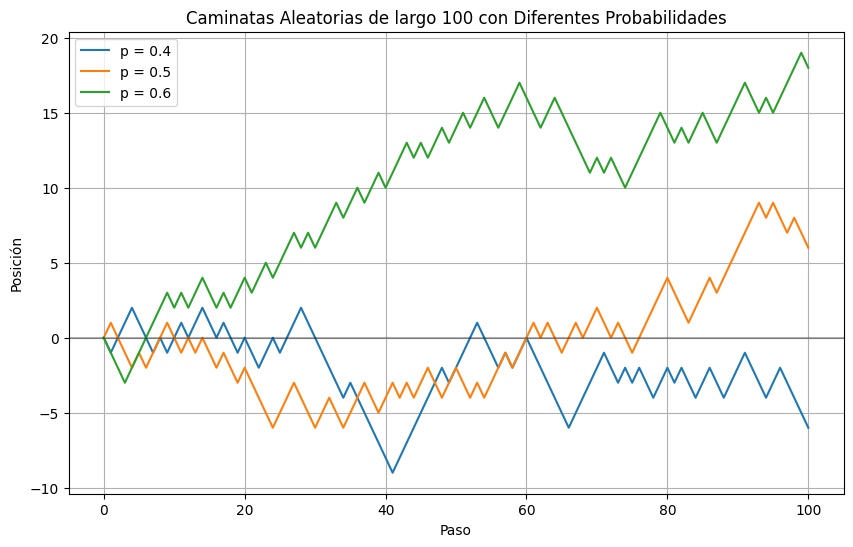

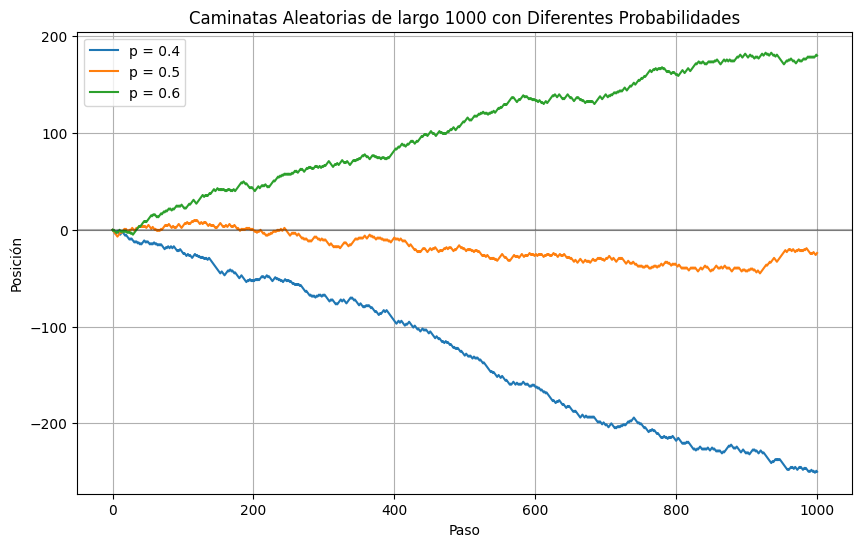

In [3]:
for N in Ns:
    plt.figure(figsize=(10, 6))
    for p in ps:
        plt.plot(range(N+1), walks[(N, p)], label=f'p = {p}')

    plt.title(f'Caminatas Aleatorias de largo {N} con Diferentes Probabilidades')
    plt.xlabel('Paso')
    plt.ylabel('Posición')
    plt.legend()
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.show()


# **1.1**
A pesar de la naturaleza estocástica del random walk se pueden identificar ciertos patrones:

- En el caso equiprobable, la caminata tiende a fluctuar alrededor del origen, sin mostrar una tendencia definida hacia valores positivos o negativos.

- Cuando la probabilidad de avanzar es mayor, la trayectoria muestra una clara tendencia ascendente, alejándose progresivamente del origen hacia valores positivos.

- En el escenario donde la probabilidad de retroceder predomina, la trayectoria exhibe una tendencia descendente, moviéndose hacia valores negativos.

Estas tendencias se vuelven más evidentes y pronunciadas conforme aumenta el número de pasos, permitiendo distinguir claramente el comportamiento asociado a cada probabilidad en el caso de N=1000.


Un dato interesante es que en una caminata aleatoria simétrica (p=0.5) en una dimensión, el caminante siempre regresará al origen con probabilidad 1. Para casos con probabilidad p≠0.5, la probabilidad de retorno al origen está dada por 1−|1−2p|. Esto significa que con cualquier sesgo en las probabilidades, existe la posibilidad de que el caminante nunca regrese a su punto de partida.

**1.2 Valor esperado de la posición final**

Considerea ahora el caso de equiprobabilidad de avanzar o retroceder. Simula 1000 caminatas independientes de 1000 pasos cada una. Grafica utilizando un histograma, la distribución empírica de posiciones finales. ¿Cuál dirías que es el valor esperado de la posición final?

Repite para distintas cantidades de pasos. ¿Cómo cambia la varianza con la cantidad de pasos?

In [4]:
num_caminatas = 1000
Ns = [100, 500, 1000, 10000]
p = 0.5

posiciones_finales = {}

for N in Ns:
    finales = []
    for _ in range(num_caminatas):
        steps = np.random.choice([1, -1], size=N, p=[p, 1-p])
        posicion_final = np.sum(steps)
        finales.append(posicion_final)
    
    posiciones_finales[N] = finales

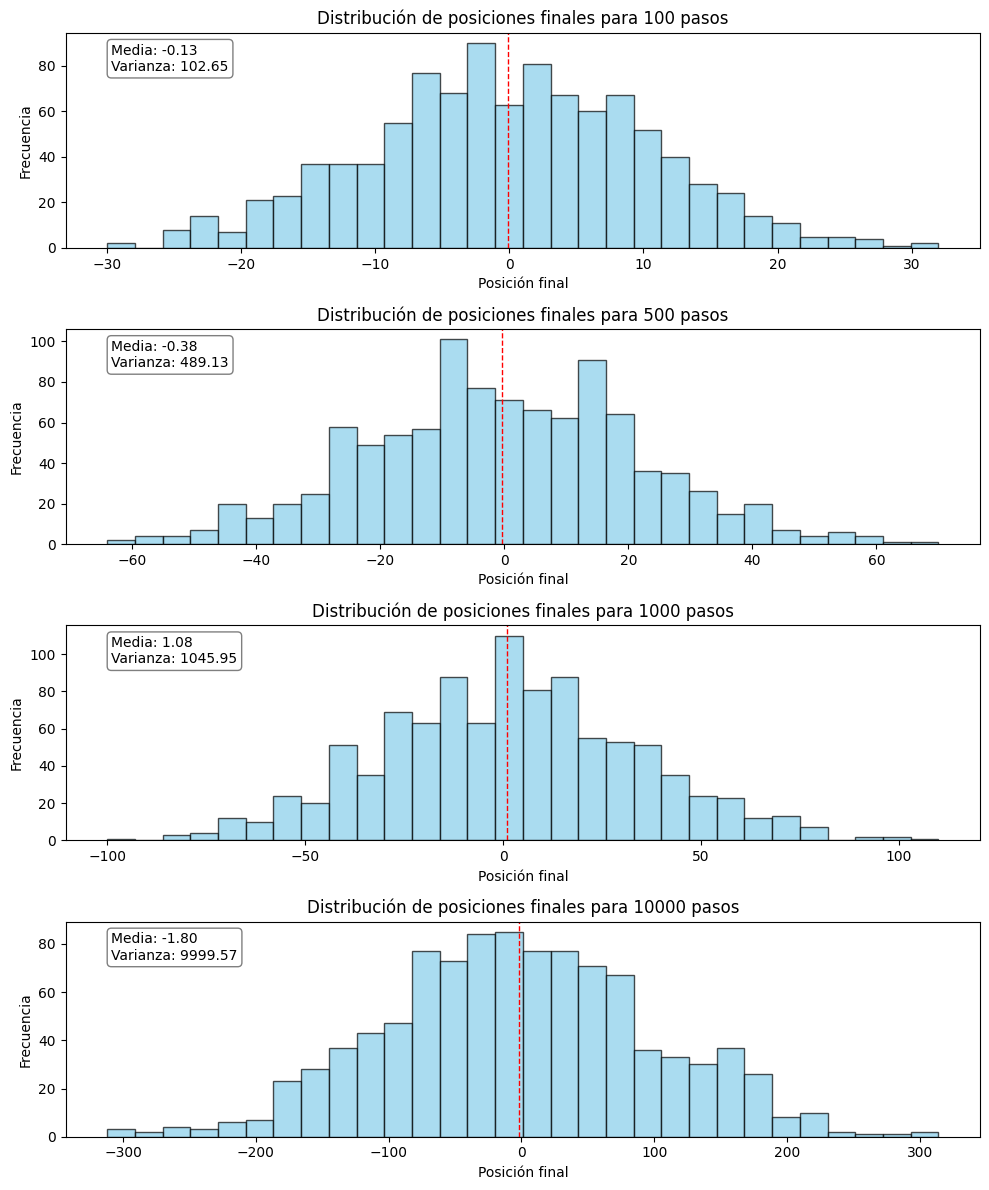

In [5]:
fig, axes = plt.subplots(len(Ns), 1, figsize=(10, 12))

for i, N in enumerate(Ns):
    axes[i].hist(
        posiciones_finales[N], bins=30, alpha=0.7, color="skyblue", edgecolor="black"
    )

    media = np.mean(posiciones_finales[N])
    varianza = np.var(posiciones_finales[N])

    axes[i].axvline(media, color="red", linestyle="dashed", linewidth=1)

    axes[i].set_title(f"Distribución de posiciones finales para {N} pasos")
    axes[i].set_xlabel("Posición final")
    axes[i].set_ylabel("Frecuencia")

    axes[i].text(
        0.05,
        0.95,
        f"Media: {media:.2f}\nVarianza: {varianza:.2f}",
        transform=axes[i].transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.5),
    )

plt.tight_layout()
plt.show()

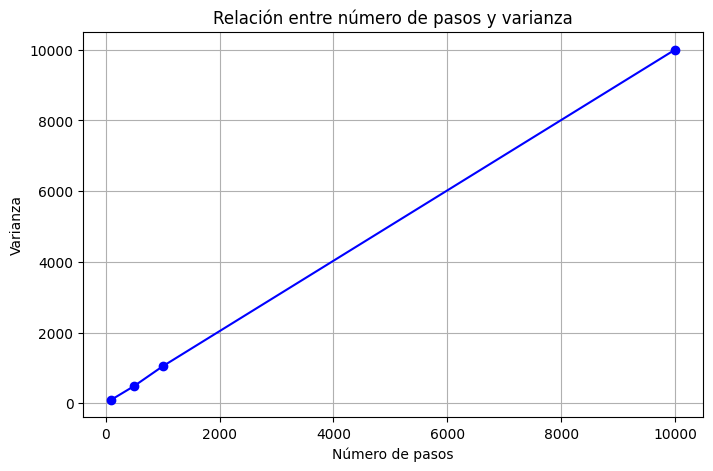

In [6]:
varianzas = [np.var(posiciones_finales[N]) for N in Ns]
plt.figure(figsize=(8, 5))
plt.plot(Ns, varianzas, "o-", color="blue")
plt.title("Relación entre número de pasos y varianza")
plt.xlabel("Número de pasos")
plt.ylabel("Varianza")
plt.grid(True)
plt.show()

**1.2**

La media del paseo alreatorio es claramente 0, ademas, se observa que, la varianza de las posiciones finales aumenta linealmente con el número de pasos. 

Esto se desprende fácilmente de aplicar la propiedad de independencia sobre cada paso del random walk:

Consideremos un paseo aleatorio donde $\epsilon_i = \pm 1$ con probabilidades iguales e independientes para $i=1,...,N$. 
Entonces $Z_i = \epsilon_1 + ... + \epsilon_i$ representa la posición del paseo aleatorio en el paso $i$.

Para calcular la varianza de la posición final, primero analizamos la varianza de cada paso individual:

Para cada $\epsilon_i$:
- $P(\epsilon_i = 1) = P(\epsilon_i = -1) = \frac{1}{2}$

- $E[\epsilon_i] = 1 \cdot \frac{1}{2} + (-1) \cdot \frac{1}{2} = 0$

- $E[\epsilon_i^2] = 1^2 \cdot \frac{1}{2} + (-1)^2 \cdot \frac{1}{2} = 1$

- $Var(\epsilon_i) = E[\epsilon_i^2] - (E[\epsilon_i])^2 = 1 - 0^2 = 1$

Para la posición final $Z_i$, aplicando la propiedad de independencia:

$Var(Z_i) = \sum_{j=1}^{i} Var(\epsilon_j) = \sum_{j=1}^{i} 1 = i$

Por lo tanto, la varianza de la posición final después de $i$ pasos es exactamente $i$, lo que explica la relación lineal observada en nuestros experimentos.




La gráfica de varianza vs. número de pasos confirma esta relación lineal, lo que valida nuestro modelo de caminata aleatoria. Los histogramas validan que la media de cada random walk equiprobable sea 0.


**1.3 Probabilidad condicional en caminatas aleatorias**

Vamos a calcular empíricamente la probabilidad condicional de un estado final dado un estado intermedio. Vamos también a recordar la definición de probabilidad condicional, y obtener el valor a partir de la misma.

Realizar 10000 simulaciones de caminatas aleatorias equiprobables de 10 pasos.

1. Registrar para cada caminata la posición en el paso 4 y la posición final.
2. Calcular empíricamente la probabilidad condicional de que la posición final sea positiva **dado que** la posición en el paso 4 fue 0.
3. Calcular la misma probabilidad pero utilizando directamente la definición de probabilidad condicional.
3. Calcular la probabilidad de terminar en una posición positiva (sin condicionar) y comparar con la probabilidad condicional obtenida previamente.

In [7]:
num_caminatas = 10000
N = 10
p=0.5
posiciones_finales = []
posiciones_4 = []
num_experimentos = 10000

for _ in range(num_caminatas):
    posicion = 0

    for i in range(N):
        paso = np.random.choice([1, -1], size=1, p=[p, 1 - p])[0]
        posicion += paso

        if i == 3:
            posiciones_4.append(posicion)

    posiciones_finales.append(posicion)

posicion_4_igual_0 = [i for i, pos in enumerate(posiciones_4) if pos == 0]
finales_positivos_dado_4_igual_0 = [i for i in posicion_4_igual_0 if posiciones_finales[i] > 0]

prob_cond_empirica = len(finales_positivos_dado_4_igual_0) / len(posicion_4_igual_0) if len(posicion_4_igual_0) > 0 else 0
print(f"Probabilidad condicional empírica: {prob_cond_empirica:.4f}")


Probabilidad condicional empírica: 0.3487


**1.2**

Dado que el random walk solamente depende del estado actual y no del pasado, la probabilidad condicional de que la posición final sea positiva **dado que** la posición en el paso 4 fue 0 es equivalente a calcular la probabilidad de que la posicion final sea positiva en un random walk de 6 pasos.

La cantidad de paseos posibles en un random walk de N pasos es $2^N$.

Para terminar en una posicion positiva es necesario que la cantidad de pasos +1 sea mayor a la cantidad de pasos -1. En el caso del random walk de largo 10 son los caminos con al menos 4 +1s y en el caso de la caminata de 10 pasos al menos 6.

La cantidad de k pasos +1 en N pasos se puede calcular como $\binom{N}{k}$ (N tomados de k).

Por lo tanto, en general la probabilidad de terminar en una posicion positiva en un random walk de N pasos se puede calcular como:

$$
P(X_N > 0) = \frac{1}{2^N} \sum_{k=\lfloor N/2 \rfloor+1}^{N} \binom{N}{k}
$$

Suplantando por los valores correspondientes:

$$
P(X_6 > 0) = 0.34375
$$

$$
P(X_{10} > 0) = 0.376953125
$$

**1.4 Random Walk en 2D**

En esta última parte del ejercicio 1 nos entrenaremos un poco más en scripts python. Supongamos ahora que el caminante puede moverse en las 4 direcciones (norte, sur, este, oeste) con igual probabilidad.

Simula una caminata de 200 pasos y grafica el resultado.

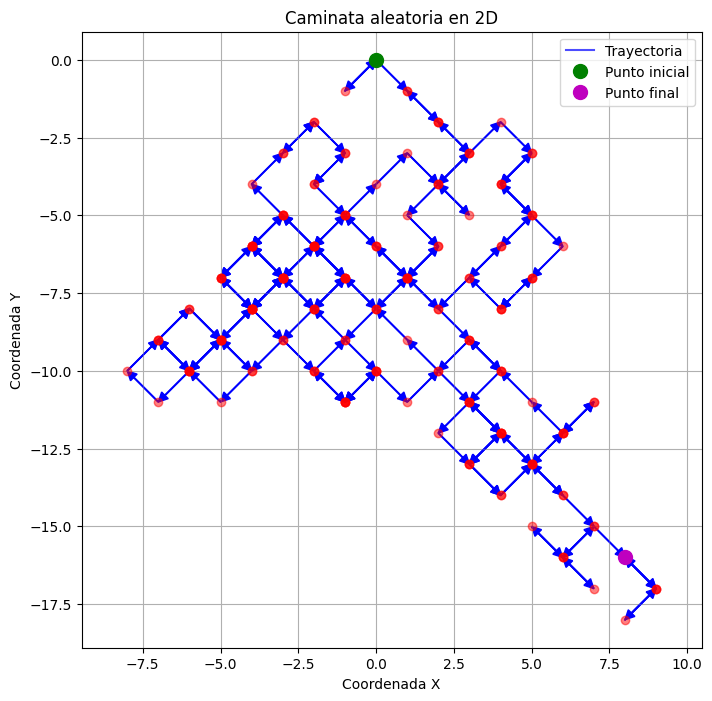

In [8]:
# definimos eje de coordenadas (x,y) x positivo es derecha, negativo izquierda, y positivo es arriba, negativo abajo
# el estado inicial es (0,0)

N = 200
initial = (0,0)
camino = [initial]
for i in range(N):
    horizontal = random.choice([-1, 1])
    vertical = random.choice([-1, 1])
    current = camino[i]
    current = (current[0] + horizontal, current[1] + vertical)
    camino.append(current)


x = [punto[0] for punto in camino]
y = [punto[1] for punto in camino]

# Graficamos la trayectoria
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'b-', alpha=0.7, label='Trayectoria') 
plt.plot(x, y, 'ro', alpha=0.5)  
plt.plot(x[0], y[0], 'go', markersize=10, label='Punto inicial')
plt.plot(x[-1], y[-1], 'mo', markersize=10, label='Punto final')

# Agregamos flechas más pequeñas para mostrar la dirección del recorrido
for i in range(0, len(x)-1):  # Reducimos el número de flechas para mejor visualización
    plt.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], 
              head_width=0.3, head_length=0.3, fc='blue', ec='blue', 
              length_includes_head=True)

plt.grid(True)
plt.title('Caminata aleatoria en 2D')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.axis('equal')
plt.legend(loc='best')
plt.show()

# 2. Ejemplo "Small World"

Vamos a trabajar con el ejemplo de "Small world" visto en clase. Vamos a considerar una cadena de markov de tiempo discreto cuyos **estados** y **transiciones** posibles entre los estados están representados en la imágen.

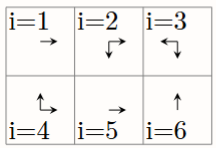

Las **probabilidades** son como sigue: a un instante dado, la probabilidad de quedarse en el mismo estado es de 0.5 y con probabilidad uniforme se mueve a un estado vecino.

1.   Primero vamos a ingresar manualmente la matriz.
2.   Luego se simulará una trayectoria.
3.   Finalmente se calculará y visualizará la distribución estacionaria.


**2.1 Diagrama de estados** Fuera del notebook dibuja a mano el diargrama de estados de la cadena. Investiga por qué se llama Small World el tipo de grafo resultante. Piensa la relación que hay entre este ejercicio y el ejercicio 1.

Respuesta:

En la figura se observa el diagrama de estados de la cadena:

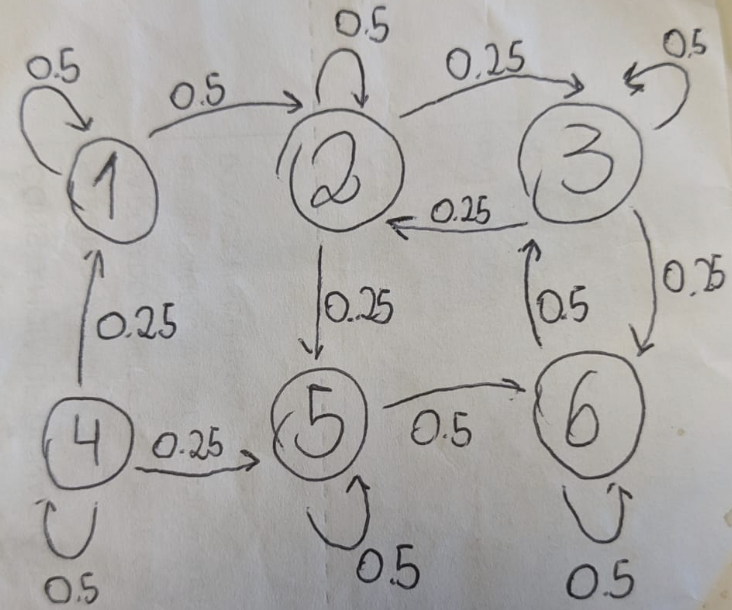

In [9]:
from IPython.display import Image

Image(filename="diagrama_estados.png")

El grafo mostrado es un ejemplo de una red "Small World", ya que se caracteriza por tener un alto coeficiente de clustering y distancias cortas entre nodos.

Se puede observar que aunque no todos los nodos están conectados directamente, existe un camino relativamente corto entre la mayoría de ellos. Por ejemplo, para ir del nodo 2 al nodo 6 solo se necesita un paso.
En general, para dos nodos cualquiera la distancia es baja, excepto para llegar desde los nodos 2,3,5 o 6 a los nodos 1 o 4.

Observar como la única forma de pasar por el nodo 4 es haber comenzado en el mismo, de otra forma no es posible llegar. Similar, al nodo 1 solo se puede llegar a través del nodo 4 o si mismo. Esto implica que una vez que se sale de la componente 4-1 no se vuelve a entrar.

La relación con el ejercicio anterior es que el próximo paso solo depende del estado actual, no de los pasos pasados. Es decir, ambos son casoscadenas de Markov.


**2.2 Ingresa la matriz de transición como un array de NumPy**


In [10]:
transition_matrix = np.array([[0.5, 0.5, 0, 0, 0, 0],
                              [0, 0.5, 0.25, 0, 0.25, 0],
                              [0, 0.25, 0.5, 0, 0, 0.25],
                              [0.25, 0, 0, 0.5, 0.25, 0],
                              [0, 0, 0, 0, 0.5, 0.5],
                              [0, 0, 0.5, 0, 0, 0.5]])

assert transition_matrix.shape == (6,6)
# todas las entradas positivas
assert np.all(transition_matrix >= 0)
# suma por fila 1
assert np.all(np.sum(transition_matrix, axis=1) == 1)

**2.3 Simula una trayectoria de la cadena de Markov** Utiliza las entradas correspondientes de la matriz P para sortear en cada paso el próximo estado. Guarda cada resultado en un vector trayectoria.

In [11]:
import random

def simular_cadena(P, pasos=20, estado_inicial=None):
    n_estados = P.shape[0]
    if estado_inicial is None:
        estado_inicial = random.randint(0, n_estados - 1)
    
    trayectoria = [estado_inicial]
    estado_actual = estado_inicial
    
    # Simular los pasos
    for _ in range(pasos):
        probabilidades = P[estado_actual]
        siguiente_estado = random.choices(range(n_estados), weights=probabilidades, k=1)[0]
      
        trayectoria.append(siguiente_estado)
        estado_actual = siguiente_estado
    
    return trayectoria

P = transition_matrix
trayectoria = simular_cadena(P, pasos=100)
print("Recorrido simulado:", trayectoria)


Recorrido simulado: [2, 2, 2, 5, 5, 2, 5, 2, 1, 4, 4, 5, 5, 2, 5, 5, 2, 1, 2, 5, 5, 2, 1, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 1, 1, 4, 5, 5, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 5, 5, 5, 2, 5, 2, 5, 2, 1, 4, 4, 4, 5, 2, 2, 1, 1, 4, 5, 5, 2, 2, 5, 5, 5, 2, 5, 5, 5, 2, 1, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 1, 1, 4, 4, 4, 5, 5, 5, 5, 5, 2, 2]


**2.4 Grafica la trayectoria obtenida**

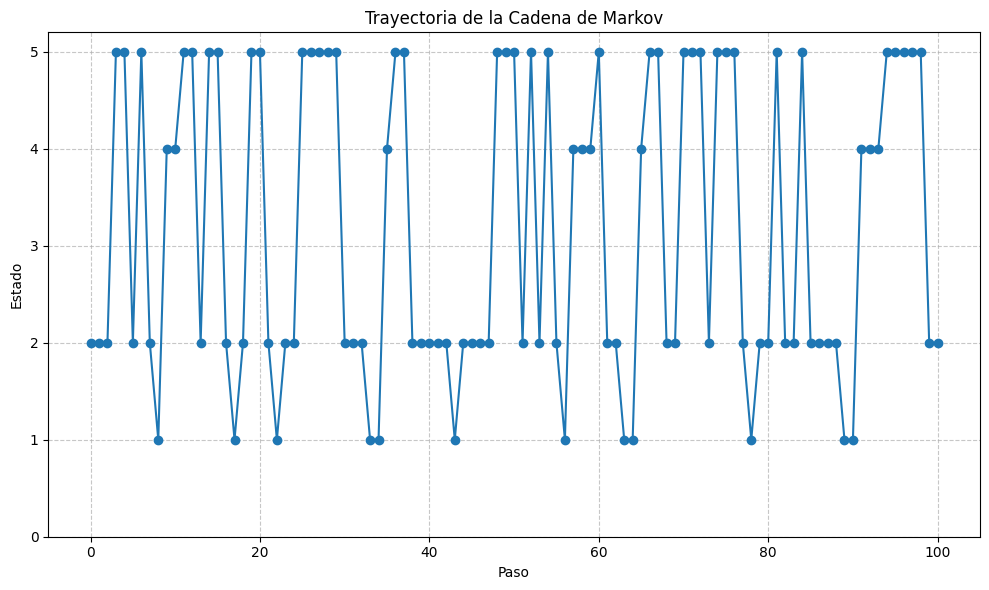

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

pasos = np.arange(len(trayectoria))

plt.plot(pasos, trayectoria, 'o-', markersize=6)

plt.xlabel('Paso')
plt.ylabel('Estado')
plt.title('Trayectoria de la Cadena de Markov')

plt.yticks(range(P.shape[0]))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**2.5 Calcula empíricamente el porcentaje de tiempo que la cadena estuvo en cada uno de los estados, según la trayectoria obtenida.** ¿cómo puede interpretarse los valores obtenidos? ¿cómo cambian a medida que aumentamos la cantidad de pasos simulada en 2.3 para la trayectoria? ¿y con respecto al estado inicial?

In [13]:
steps_en_estado = np.zeros(P.shape[0])
for estado in trayectoria:
    steps_en_estado[estado] += 1

porcentaje_tiempo = steps_en_estado / len(trayectoria)
print("Porcentaje de tiempo en cada estado:")
for estado, porcentaje in enumerate(porcentaje_tiempo):
    print(f"Estado {estado + 1}: {porcentaje:.2%}")



Porcentaje de tiempo en cada estado:
Estado 1: 0.00%
Estado 2: 11.88%
Estado 3: 41.58%
Estado 4: 0.00%
Estado 5: 9.90%
Estado 6: 36.63%


Los valores obtenidos representan la proporción de tiempo que la cadena de Markov pasó en cada estado durante la simulación. Estos porcentajes pueden interpretarse como una aproximación empírica de la distribución estacionaria de la cadena.

Observando los resultados, notamos que la distribución de tiempo no es uniforme entre los estados. En particular, con el estado inicial 2, vemos que los estados 1 y 4 tienen porcentajes nulos, indicando que estos estados son inalcanzables desde el estado inicial elegido.

A medida que aumentamos la cantidad de pasos simulados, estos porcentajes empíricos deberían estabilizarse y converger hacia la distribución estacionaria teórica que calcularemos en la parte 2.7. Con más pasos, el efecto del estado inicial se diluye y la cadena pasa más tiempo explorando todos los estados accesibles según sus probabilidades de transición.

El estado inicial influye significativamente en simulaciones cortas, pero su efecto disminuye con simulaciones más largas. Si la cadena es ergódica, eventualmente la distribución convergerá a la estacionaria independientemente del estado inicial elegido.

**2.6 Obten y grafica la evolución en el tiempo de una distribución inicial dada.** Utiliza la propiedad vista en clase respecto a matrices estocásticas. Analiza el resultado y observa si la distribución convergió o no. Prueba varias veces, con distintas distribuciones iniciales. ¿Qué observas? ¿Por qué?

Se hara para una caminata de 12 pasos, tomando como estados iniciales 1 y 5.

$$
\mathbf{p}^{(1)}_0 = (1,0,0,0,0,0) \quad \text{y} \quad \mathbf{p}^{(5)}_0 (0,0,0,0,1,0)
$$

Las probabilidades de los distintos estados son:

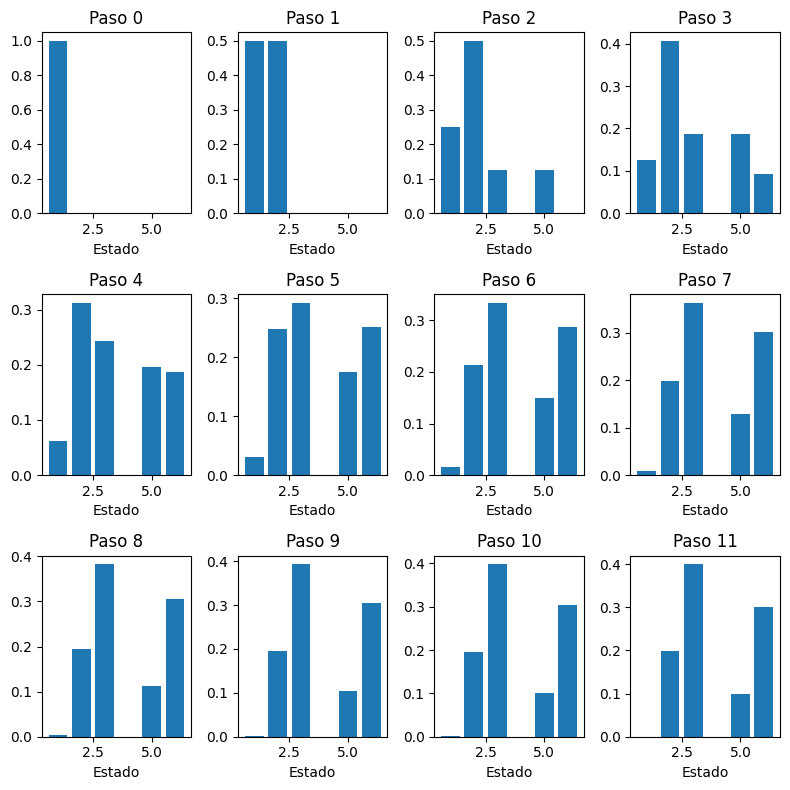

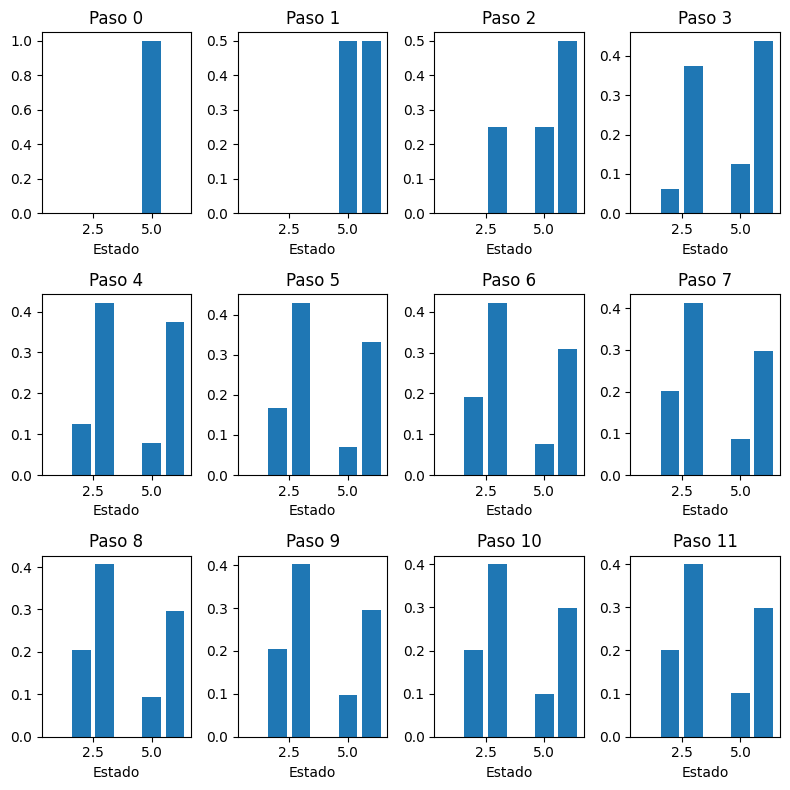

In [14]:
def avanzar_distribucion(distribucion, P):
    return distribucion @ P

def calcular_evolucion(distribucion_inicial, P, n_pasos):
    evolucion = np.zeros((n_pasos + 1, P.shape[0]))
    evolucion[0] = distribucion_inicial
    for t in range(1, n_pasos + 1):
        evolucion[t] = avanzar_distribucion(evolucion[t-1], P)
    return evolucion

def plot_evolucion(evolucion, n_pasos):
    plt.figure(figsize=(8, 8))
    for t in range(n_pasos):
        plt.subplot(3, 4, t + 1)
        plt.bar(range(1, P.shape[0] + 1), evolucion[t])
        plt.title(f'Paso {t}')
        plt.xlabel('Estado')
    plt.tight_layout()
    plt.show()

# Definir distribuciones iniciales
p1_0 = np.zeros(P.shape[0])
p1_0[0] = 1

p5_0 = np.zeros(P.shape[0])
p5_0[4] = 1

n_pasos = 12

evolucion_p1 = calcular_evolucion(p1_0, P, n_pasos)
evolucion_p5 = calcular_evolucion(p5_0, P, n_pasos)

plot_evolucion(evolucion_p1, n_pasos)
plot_evolucion(evolucion_p5, n_pasos)

En las gráficas anteriores, se puede ver claramente cómo las distribuciones de probabilidad evolucionan con cada paso, y aunque comienzan en estados diferentes (estado 1 y estado 5), ambas tienden hacia una misma distribución final. Esto ocurre porque la cadena de Markov es $ergódica^1$, lo que garantiza la existencia de una única distribución estacionaria a la que converge el sistema independientemente del estado inicial.



### Consulta:

$(^1)$: En realidad no estoy tan seguro, entiendo que para que se cumpla se tiene que cumplir que:
- sea aperiódica, como tiene self-loops es posible volver al mismo estado en una cantidad cualquiera de pasos, entonces lo cumple
- que sea positive recurrent, que entiendo que es algo así como que desde un estado se puede llegar a cualquier otro estado (no se cumple)

Entonces, si esta es la definición no sería ergódico no? Podría igual existir una distribución estacionaria?

Después encontré esto: [It can be shown that a finite state irreducible Markov chain is ergodic if it has an aperiodic state.](https://en.wikipedia.org/wiki/Markov_chain#Ergodicity) que parece arreglar el problema para el caso finito (nuestro), entonces sí sería ergódica?

Al final me crucé con [esto](https://math.stackexchange.com/questions/4444489/confusion-about-definition-of-ergodicity-in-markov-chains) y me terminé de confundir

**2.7 Obten la distribución estacionaria a partir de un cálculo algebraico, y no una simulación (Estamos asumiendo que la misma existe.).**  Utiliza las propiedades vistas en clase. Compara el resultado con lo graficado anteriormente, ¿qué concluyes? Compara también el resultado con el obtenido en 2.3.

Suponiendo que la distribución estacionaria existe, es posible utilizarla propiedad que:

$$
\mathbf{p}_\infty = \mathbf{p}_\infty \mathbf{P} \rightarrow \mathbf{p}_\infty (\mathbf{P} - \mathbf{I}) = 0
$$

donde $\mathbf{P}$ es la matriz de transicion. Resolviendo la ecuacion, se llega a que:

$$
\mathbf{p}_\infty = [0, \frac{1}{5}, \frac{1}{5}, 0, \frac{1}{10}, \frac{3}{10}]
$$

